In [112]:
import uproot
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math 
from sklearn.metrics import accuracy_score

In [117]:
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
file_polm80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hhqq_14364.root")
file_polm80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hzqq_13391.root")
file_polm80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qq_13399_to_13402.root")
file_polm80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qqqq_13394_to_13397.root")
file_polm80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qqqqqq.root")
file_polm80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_WWH_qqqqH_14734.root")
file_polm80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ZZH_qqqqH_14726.root")


tree_polm80_hhz_signal = file_polm80_hhz_signal["MVATrainingVariables"]
tree_polm80_hhz_signal.keys()
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_ee_qq_BG = file_polm80_ee_qq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqq_BG = file_polm80_ee_qqqq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqqqq_BG = file_polm80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polm80_WWH_qqqqH_BG = file_polm80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polm80_ZZH_qqqqH_BG = file_polm80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
df_polm80_HHZ=tree_polm80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_BG=tree_polm80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_BG=df_polm80_BG.append(tree_polm80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polm80_BG=df_polm80_BG.append(tree_polm80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polm80_BG=df_polm80_BG.append(tree_polm80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polm80_BG=df_polm80_BG.append(tree_polm80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polm80_BG=df_polm80_BG.append(tree_polm80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)

#drop weight column here
Y_polm80_HHZ=np.ones((df_polm80_HHZ.shape[0],1))
#print("shape of data frame BG after",df_polm80_BG.shape,df_polm80_BG.tail())
Y_polm80_BG=np.zeros((df_polm80_BG.shape[0],1))
#print ("polm80 shape of Ysig, back",Y_polm80_HHZ.shape,Y_polm80_BG.shape)
df_polm80_HHZ.head()
df_polm80_total=df_polm80_HHZ.append(df_polm80_BG,ignore_index=True)
y_polm80_total=np.append(Y_polm80_HHZ,Y_polm80_BG)
X_polm80_total=np.asarray(df_polm80_total)
X_polm80_train, X_polm80_test, y_polm80_train, y_polm80_test = train_test_split(df_polm80_total, y_polm80_total, test_size=0.2, random_state=123)
#print("polm80 shape of X_train/X_test/y_train/y_test",X_polm80_train.shape, X_polm80_test.shape, y_polm80_train.shape, y_polm80_test.shape)

data_polm80_train=X_polm80_train.iloc[:,1:]
weight_polm80_train = X_polm80_train.iloc[:,0]
weight_polm80_test = X_polm80_test.iloc[:,0]
weight_polm80_array_test=np.asarray(weight_polm80_test)
weight_polm80_array_train=np.asarray(weight_polm80_train)

weights_polm80_test_B=np.ma.masked_where(y_polm80_test==1,weight_polm80_array_test)
weights_polm80_test_S=np.ma.masked_where(y_polm80_test==0,weight_polm80_array_test)
#print("test all weights",np.sum(weight_polm80_array_test),np.sum(weights_polm80_test_B),np.sum(weights_polm80_test_S))

sum_wpos_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)

sum_wpos_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
recale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
recale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

# print weight statistics 
#print ('weight statistics: wpos=%g, wneg=%g, ratio=%g' % ( sum_wpos_train_polm80, sum_wneg_train_polm80, sum_wneg_train_polm80/sum_wpos_train_polm80 ))
scale_pos_weight_train_polm80 = sum_wneg_train_polm80/sum_wpos_train_polm80
#print("shape of weight test",weight_polm80_test.shape,weight_polm80_array_test.shape)
#print("shape of weight train",weight_polm80_train.shape,weight_polm80_array_train.shape)
#print("weight_test 10",math.sqrt(weight_polm80_array_test.item(10)))
data_polm80_test=X_polm80_test.iloc[:,1:]
#print("weight_train",weight_polm80_train, weight_polm80_train.shape,data_polm80_train.shape)
xgmat_polm80_train = xgb.DMatrix( data_polm80_train, label=y_polm80_train, missing = -999.0, weight=weight_polm80_train )
#print("matrix shape",xgmat_train.shape)
#works only for equal weights, we don't have that, so recheck that to balance dataset
#label=xgmat_train.get_label()
#print("label stuff",label)
#print("ratio of labels",float(np.sum(label == 0)),float(np.sum(label==1)),float(np.sum(label == 0)) / float(np.sum(label==1)))
param_polm80 = {'max_depth': 6, 'eta': 0.1, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80}
num_round_polm80=120
#detected automatically
#param['nthread'] = 4
#update conservative max_depth to 3
#param['max_depth']=6
#use area under curve right now
#param['eval_metric'] = 'auc'
XGB_Model_polm80 = xgb.train(param_polm80,xgmat_polm80_train,num_round_polm80)
XGB_Model_polm80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polm80.model")
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'

shape of data frame BG after (1066188, 34)            weight  comb_jet1_mass  comb_jet2_mass  comb_jet3_mass  \
1066183  0.096428      145.999863      131.364487      103.200218   
1066184  0.096428      288.501190      124.420967       87.956657   
1066185  0.096428      361.566254      179.200882      107.332779   
1066186  0.096428      762.303772      269.483826      100.796486   
1066187  0.096428      294.328400      281.172791       73.265045   

         comb_jet1_BTagMax  comb_jet2_BTagMax  comb_jet3_BTagMax  \
1066183           0.507329           0.604600           0.074601   
1066184           0.962611           0.958898           0.116164   
1066185           0.726677           0.266001           0.067873   
1066186           0.073814           0.943294           0.996953   
1066187           0.060552           0.751883           0.189808   

         comb_jet1_LTagMax  comb_jet2_LTagMax  comb_jet3_LTagMax  ...  \
1066183           0.011084           0.853165           0.80

In [120]:
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
file_polp80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hhqq_14365.root")
file_polp80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hzqq_13392.root")
file_polp80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qq_13398.root")
file_polp80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qqqq_13393.root")
file_polp80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ee_qqqqqq.root")
file_polp80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_WWH_qqqqH_14735.root")
file_polp80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_ZZH_qqqqH_14727.root")


tree_polp80_hhz_signal = file_polp80_hhz_signal["MVATrainingVariables"]
tree_polp80_hhz_signal.keys()
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_ee_qq_BG = file_polp80_ee_qq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqq_BG = file_polp80_ee_qqqq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqqqq_BG = file_polp80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polp80_WWH_qqqqH_BG = file_polp80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polp80_ZZH_qqqqH_BG = file_polp80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
df_polp80_HHZ=tree_polp80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG=tree_polp80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG=df_polp80_BG.append(tree_polp80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polp80_BG=df_polp80_BG.append(tree_polp80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polp80_BG=df_polp80_BG.append(tree_polp80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polp80_BG=df_polp80_BG.append(tree_polp80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)
df_polp80_BG=df_polp80_BG.append(tree_polp80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"]), ignore_index=True)

#drop weight column here
Y_polp80_HHZ=np.ones((df_polp80_HHZ.shape[0],1))
Y_polp80_BG=np.zeros((df_polp80_BG.shape[0],1))
df_polp80_total=df_polp80_HHZ.append(df_polp80_BG,ignore_index=True)
y_polp80_total=np.append(Y_polp80_HHZ,Y_polp80_BG)
X_polp80_total=np.asarray(df_polp80_total)
X_polp80_train, X_polp80_test, y_polp80_train, y_polp80_test = train_test_split(df_polp80_total, y_polp80_total, test_size=0.2, random_state=123)

data_polp80_train=X_polp80_train.iloc[:,1:]
weight_polp80_train = X_polp80_train.iloc[:,0]
weight_polp80_test = X_polp80_test.iloc[:,0]
weight_polp80_array_test=np.asarray(weight_polp80_test)
weight_polp80_array_train=np.asarray(weight_polp80_train)

weights_polp80_test_B=np.ma.masked_where(y_polp80_test==1,weight_polp80_array_test)
weights_polp80_test_S=np.ma.masked_where(y_polp80_test==0,weight_polp80_array_test)

sum_wpos_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)

sum_wpos_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
recale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
recale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

scale_pos_weight_train_polp80 = sum_wneg_train_polp80/sum_wpos_train_polp80
data_polp80_test=X_polp80_test.iloc[:,1:]
xgmat_polp80_train = xgb.DMatrix( data_polp80_train, label=y_polp80_train, missing = -999.0, weight=weight_polp80_train )
param_polp80 = {'max_depth': 6, 'eta': 0.1, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polp80}
num_round_polp80=120
XGB_Model_polp80 = xgb.train(param_polp80,xgmat_polp80_train,num_round_polp80)
XGB_Model_polp80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polp80.model")
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80.model'

In [131]:
test_bins_BDT_polp80=30
pred_lim_polp80= np.linspace(2.5,6,test_bins_BDT_polp80, endpoint=True)

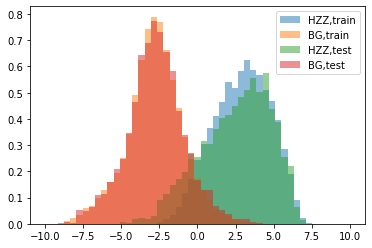

best result_polp80 4.431034482758621 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  2.193486181553453 3.2938751679612324 0.39973423323897744 0.9363821425590954


In [132]:
import matplotlib.pyplot as plt

sum_wpos_polp80_train = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_polp80_train = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)
sum_wpos_polp80_test = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_polp80_test = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_polp80_train/sum_wneg_polp80_train 
rescale_polp80_test_SIG=sum_wpos_polp80_train/sum_wpos_polp80_test
rescale_polp80_test_BG=sum_wpos_polp80_train/sum_wneg_polp80_test

modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80.model'
xgmat_polp80_test = xgb.DMatrix( data_polp80_test, missing = -999.0, weight=weight_polp80_test )
bst_polp80 = xgb.Booster(model_file = modelfile_polp80)
ypred_polp80_test = bst_polp80.predict( xgmat_polp80_test )
ypred_polp80_train = bst_polp80.predict( xgmat_polp80_train )
label_polp80 = xgmat_polp80_train.get_label()

ypred_polp80_test_B=np.ma.masked_where(y_polp80_test==1,ypred_polp80_test)
ypred_polp80_test_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test)
ypred_polp80_train_B=np.ma.masked_where(y_polp80_train==1,ypred_polp80_train)
ypred_polp80_train_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train)

bins_polp80= np.linspace(-10,10,50)
ypred_polp80_train_B=ypred_polp80_train_B.filled(-50)
ypred_polp80_train_S=ypred_polp80_train_S.filled(50)
ypred_polp80_test_B=ypred_polp80_test_B.filled(-50)
ypred_polp80_test_S=ypred_polp80_test_S.filled(50)
hist_S_polp80_train = plt.hist(ypred_polp80_train_S, bins, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
hist_B_polp80_train = plt.hist(ypred_polp80_train_B, bins, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
hist_S_polp80_test = plt.hist(ypred_polp80_test_S, bins, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
hist_B_polp80_test = plt.hist(ypred_polp80_test_B, bins, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
count_sig_polp80_test = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_test)):
    if (y_polp80_test[i]==1):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_test[i]>pred_lim[j]):
                count_sig_polp80_test[j]=count_sig_polp80_test[j]+weight_polp80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_test[i]>pred_lim_polp80[j]):
                count_BG_polp80_test[j]=count_BG_polp80_test[j]+weight_polp80_array_test.item(i)
for i in range(len(ypred_polp80_train)):
    if (y_polp80_train[i]==1):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_train[i]>pred_lim_polp80[j]):
                count_sig_polp80_train[j]=count_sig_polp80_train[j]+weight_polp80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_train[i]>pred_lim_polp80[j]):
                count_BG_polp80_train[j]=count_BG_polp80_train[j]+weight_polp80_array_train.item(i)
max_sig_polp80=0
max_sig_polp80_j=-1
for j in range (len(pred_lim_polp80)):
    if ((count_sig_polp80_train[j]+count_sig_polp80_test[j])/math.sqrt(count_sig_polp80_train[j]+count_sig_polp80_test[j]+count_BG_polp80_train[j]+count_BG_polp80_test[j]))>max_sig_polp80:
        max_sig_polp80=(count_sig_polp80_train[j]+count_sig_polp80_test[j])/math.sqrt(count_sig_polp80_train[j]+count_sig_polp80_test[j]+count_BG_polp80_train[j]+count_BG_polp80_test[j])
        max_sig_polp80_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_train[max_sig_polp80_j]+count_sig_polp80_test[max_sig_polp80_j],count_BG_polp80_train[max_sig_polp80_j]+count_BG_polp80_test[max_sig_polp80_j],(count_sig_polp80_train[max_sig_polp80_j]+count_sig_polp80_test[max_sig_polp80_j])/(count_sig_polp80_train[max_sig_polp80_j]+count_sig_polp80_test[max_sig_polp80_j]+count_BG_polp80_train[max_sig_polp80_j]+count_BG_polp80_test[max_sig_polp80_j]),(count_sig_polp80_train[max_sig_polp80_j]+count_sig_polp80_test[max_sig_polp80_j])/math.sqrt(count_sig_polp80_train[max_sig_polp80_j]+count_sig_polp80_test[max_sig_polp80_j]+count_BG_polp80_train[max_sig_polp80_j]+count_BG_polp80_test[max_sig_polp80_j]))

In [133]:
test_bins_BDT_polm80=30
pred_lim_polm80= np.linspace(2.5,6,test_bins_BDT_polm80, endpoint=True)

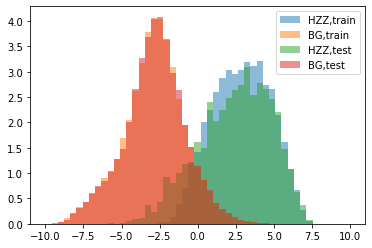

best result_polm80 4.793103448275862 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  9.796875296160579 18.65365114901215 0.3443477685743435 1.8367177647189037


In [134]:
import matplotlib.pyplot as plt

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
xgmat_polm80_test = xgb.DMatrix( data_polm80_test, missing = -999.0, weight=weight_polm80_test )
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_test = bst_polm80.predict( xgmat_polm80_test )
ypred_polm80_train = bst_polm80.predict( xgmat_polm80_train )
label_polm80 = xgmat_polm80_train.get_label()

ypred_polm80_test_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test)
ypred_polm80_test_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test)
ypred_polm80_train_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train)
ypred_polm80_train_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train)

bins_polm80= np.linspace(-10,10,50)
ypred_polm80_train_B=ypred_polm80_train_B.filled(-50)
ypred_polm80_train_S=ypred_polm80_train_S.filled(50)
ypred_polm80_test_B=ypred_polm80_test_B.filled(-50)
ypred_polm80_test_S=ypred_polm80_test_S.filled(50)
hist_S_polm80_train = plt.hist(ypred_polm80_train_S, bins, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train = plt.hist(ypred_polm80_train_B, bins, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test = plt.hist(ypred_polm80_test_S, bins, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test = plt.hist(ypred_polm80_test_B, bins, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
test_bins_BDT_polm80=30
pred_lim_polm80= np.linspace(2.5,6,test_bins_BDT_polm80, endpoint=True)
count_sig_polm80_test = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_test)):
    if (y_polm80_test[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim[j]):
                count_sig_polm80_test[j]=count_sig_polm80_test[j]+weight_polm80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_BG_polm80_test[j]=count_BG_polm80_test[j]+weight_polm80_array_test.item(i)
for i in range(len(ypred_polm80_train)):
    if (y_polm80_train[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_sig_polm80_train[j]=count_sig_polm80_train[j]+weight_polm80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_BG_polm80_train[j]=count_BG_polm80_train[j]+weight_polm80_array_train.item(i)
max_sig_polm80=0
max_sig_polm80_j=-1
for j in range (len(pred_lim_polm80)):
    if ((count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train[j]+count_BG_polm80_test[j]))>max_sig_polm80:
        max_sig_polm80=(count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train[j]+count_BG_polm80_test[j])
        max_sig_polm80_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j],count_BG_polm80_train[max_sig_polm80_j]+count_BG_polm80_test[max_sig_polm80_j],(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train[max_sig_polm80_j]+count_BG_polm80_test[max_sig_polm80_j]),(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/math.sqrt(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train[max_sig_polm80_j]+count_BG_polm80_test[max_sig_polm80_j]))

In [143]:
file_polp80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hhqq_14365_AllEvents.root")
tree_polp80_hhz_signal_AllEvents = file_polp80_hhz_signal["MVATrainingVariables"]

df_polp80_HHZ_AllEvents=tree_polp80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polp80_HHZ_AllEvents=df_polp80_HHZ_AllEvents.iloc[:,1:]
weight_polp80_HHZ_AllEvents = df_polp80_HHZ_AllEvents.iloc[:,0]
weight_polp80_array_HHZ_AllEvents=np.asarray(weight_polp80_HHZ_AllEvents)
xgmat_polp80_HHZ_AllEvents = xgb.DMatrix( data_polp80_HHZ_AllEvents, label=y_polp80_train, missing = -999.0, weight=weight_polp80_HHZ_AllEvents )
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80.model'
bst_polp80 = xgb.Booster(model_file = modelfile_polp80)
ypred_polp80_HHZ_AllEvents= bst_polp80.predict( xgmat_polp80_HHZ_AllEvents )
count_sig_polp80_HHZ_AllEvents = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_HHZ_AllEvents[i]>pred_lim_polp80[j]):
                count_sig_polp80_HHZ_AllEvents[j]=count_sig_polp80_HHZ_AllEvents[j]+weight_polp80_array_HHZ_AllEvents.item(i)
max_sig_polp80_HHZ_All=0
max_sig_polp80_HHZ_All_j=-1
for j in range (len(pred_lim_polp80)):
    if(count_sig_polp80_HHZ_AllEvents[j]<(count_sig_polp80_train[j]+count_sig_polp80_test[j])):
        print("all should be more than bbbbqq events",count_sig_polp80_HHZ_AllEvents[j],count_sig_polp80_train[j]+count_sig_polp80_test[j])
    if (count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train[j]+count_BG_polp80_test[j]))>max_sig_polp80_HHZ_All:
        max_sig_polp80_HHZ_All=count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train[j]+count_BG_polp80_test[j])
        max_sig_polp80_HHZ_All_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_HHZ_All_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j],count_BG_polp80_train[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test[max_sig_polp80_HHZ_All_j],count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test[max_sig_polp80_HHZ_All_j]),count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test[max_sig_polp80_HHZ_All_j]))
#now do the negativ results
file_polm80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_1_00_M2_75_M3_50_150_hhqq_14364_AllEvents.root")
tree_polm80_hhz_signal_AllEvents = file_polm80_hhz_signal["MVATrainingVariables"]

df_polm80_HHZ_AllEvents=tree_polm80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polm80_HHZ_AllEvents=df_polm80_HHZ_AllEvents.iloc[:,1:]
weight_polm80_HHZ_AllEvents = df_polm80_HHZ_AllEvents.iloc[:,0]
weight_polm80_array_HHZ_AllEvents=np.asarray(weight_polm80_HHZ_AllEvents)
xgmat_polm80_HHZ_AllEvents = xgb.DMatrix( data_polm80_HHZ_AllEvents, label=y_polm80_train, missing = -999.0, weight=weight_polm80_HHZ_AllEvents )
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_HHZ_AllEvents= bst_polm80.predict( xgmat_polm80_HHZ_AllEvents )
test_bins_BDT_polm80=30
count_sig_polm80_HHZ_AllEvents = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_HHZ_AllEvents[i]>pred_lim_polm80[j]):
                count_sig_polm80_HHZ_AllEvents[j]=count_sig_polm80_HHZ_AllEvents[j]+weight_polm80_array_HHZ_AllEvents.item(i)
max_sig_polm80_HHZ_All=0
max_sig_polm80_HHZ_All_j=-1
for j in range (len(pred_lim_polm80)):
    if(count_sig_polm80_HHZ_AllEvents[j]<(count_sig_polm80_train[j]+count_sig_polm80_test[j])):
        print("all polm80 should be more than bbbbqq events",count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_train[j]+count_sig_polm80_test[j])
    if (count_sig_polm80_HHZ_AllEvents[j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train[j]+count_BG_polm80_test[j]))>max_sig_polm80_HHZ_All:
        max_sig_polm80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train[j]+count_BG_polm80_test[j])
        max_sig_polm80_HHZ_All_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_HHZ_All_j],
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j],count_BG_polm80_train[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_HHZ_All_j],
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_HHZ_All_j]),
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_HHZ_All_j]))

max_sig_polm80_polp80_HHZ_All=0
max_sig_polm80_comb_HHZ_All_j=-1
max_sig_polp80_comb_HHZ_All_i=-1
for j in range (len(pred_lim_polm80)):
    for i in range (len(pred_lim_polp80)):
        if ((count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train[j]+count_BG_polm80_test[j]+count_BG_polp80_train[i]+count_BG_polp80_test[i]))>max_sig_polm80_polp80_HHZ_All:
            max_sig_polm80_polp80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train[j]+count_BG_polm80_test[j]+count_BG_polp80_train[i]+count_BG_polp80_test[i])
            max_sig_polm80_comb_HHZ_All_j=j
            max_sig_polp80_comb_HHZ_All_i=i
print("best result_polm80_polp80 combined",pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j],pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i],      
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_BG_polp80_train[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_comb_HHZ_All_j],
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_comb_HHZ_All_j]),
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test[max_sig_polm80_comb_HHZ_All_j]))

best result_polp80 4.431034482758621 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  2.193486181553453 3.2938751679612324 0.39973423323897744 0.9363821425590954
best result_polm80 4.793103448275862 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  9.796875296160579 18.65365114901215 0.3443477685743435 1.8367177647189037
best result_polm80_polp80 combined 4.793103448275862 4.310344827586207 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  12.197718371869996 22.827619384450372 0.3482541255342756 2.061044818801608
